## IMPORTING LIBRARIES

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
import seaborn as sns
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
#Loading the dataset
data = pd.read_csv("C:/Users/Admin/Downloads/marketing_campaign (3).csv", sep="\t")
print("Number of datapoints:", len(data))
df=data.copy()
data.head()


Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#(df.isna().sum()/df.count())*100  there is 1.-08 percent null value present in income so i drop the data points which contains null values
df.dropna(inplace=True)

<Axes: >

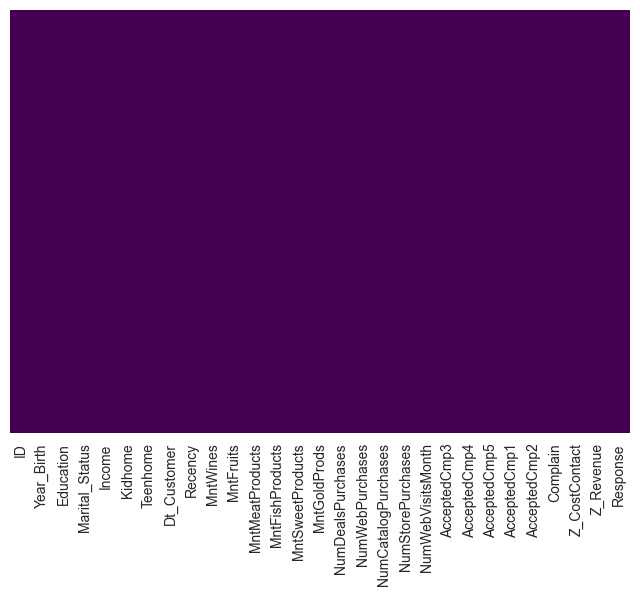

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df["Age"]=2015 -df["Year_Birth"]

<Axes: >

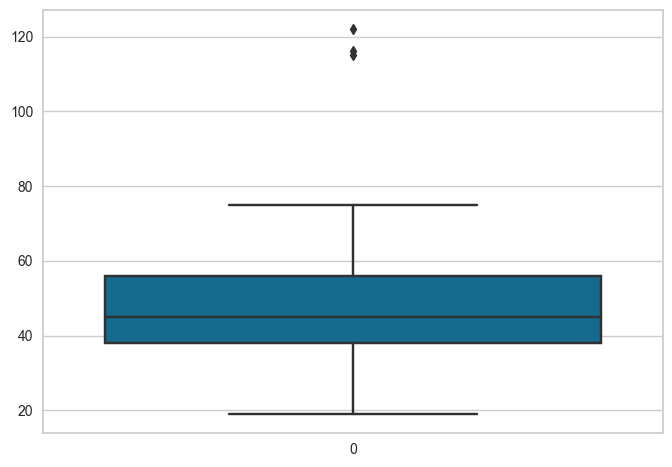

In [8]:
sns.boxplot (df["Age"])

In [9]:
df.loc[df['Age']<=19 ,"AgeGroup"]="Teen"
df.loc[(df["Age"]>=20) &(df["Age"]<=39) ,"AgeGroup"]="Adults"
df.loc[ (df["Age"]>=40)&(df["Age"]<=59),"AgeGroup"]="Middle Age Adults"
df.loc[ (df["Age"]>=60),"AgeGroup"]="Seniors"


In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,58,Middle Age Adults
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,61,Seniors
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,50,Middle Age Adults
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,31,Adults
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,34,Adults


In [11]:
df["TotalSpendings"]=df["MntFruits"]+df["MntWines"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [12]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [13]:
df.Education.value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [14]:
df.Marital_Status.value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df.Marital_Status=df.Marital_Status.replace({"Together":"Married",
                                            "Divorced":"Single",
                                            "Widow":"Single",
                                            "Alone":"Single",
                                            "Absurd":"Single",
                                            "YOLO":"Single"})

In [27]:
import datetime
a=df.Dt_Customer 
#df.Dt_Customer =pd.to_datetime(df.Dt_Customer,dayfirst=True)
#df['Dt_Customer'] = df['Dt_Customer'].map(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M'))

df["MonthEnorllement"]=(2015-a.dt.year) *12+(1-a.dt.month)

In [28]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup,TotalSpendings,Children,MonthEnorllement
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,58,Middle Age Adults,1617,0,28
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,61,Seniors,27,2,10
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,50,Middle Age Adults,776,0,17
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,31,Adults,53,1,11
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,34,Adults,422,1,12


<Axes: >

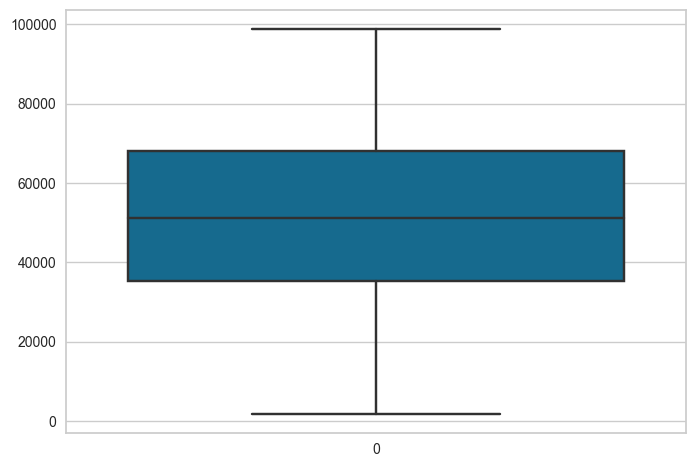

In [29]:
sns.boxplot(df["Income"])

In [30]:
df=df[df["Age"]<100]
df=df[df["Income"]<100000]

In [31]:
marital_group = df.groupby("Marital_Status").agg(TotalRecords=("Marital_Status","size"),
                                                 TotalAmount=("TotalSpendings","sum"),
                                                 AvgAmount=("TotalSpendings",'mean'))
marital_group

,TotalRecords,TotalAmount,AvgAmount
Marital_Status,,,
Married,1420,845646,595.525352
Single,780,486908,624.241026


In [32]:
age_group = df.groupby("AgeGroup").agg(TotalRecords=("AgeGroup","size"),
                                                 TotalAmount=("TotalSpendings","sum"),
                                                 AvgAmount=("TotalSpendings",'mean'))
age_group

,TotalRecords,TotalAmount,AvgAmount
AgeGroup,,,
Adults,681,365819,537.179148
Middle Age Adults,1158,698162,602.903282
Seniors,359,268435,747.729805
Teen,2,138,69.000000


Text(0.5, 1.0, 'Total Records of AgeGroup')

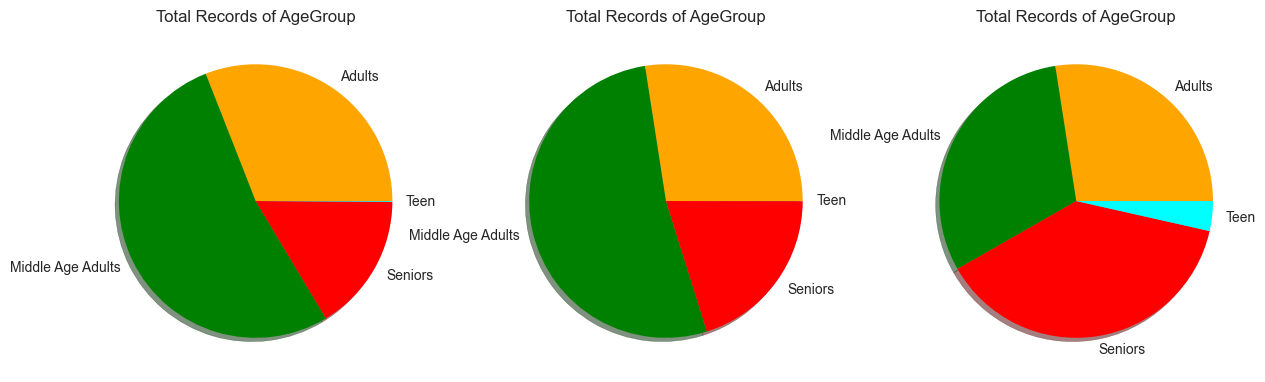

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.pie(x=age_group.TotalRecords,labels=age_group.index,colors=['orange','green','red','cyan'],shadow=True)
plt.title(f"Total Records of {age_group.index.name}")

plt.subplot(1,3,2)
plt.pie(x=age_group.TotalAmount,labels=age_group.index,colors=['orange','green','red','cyan'],shadow=True)
plt.title(f"Total Records of {age_group.index.name}")

plt.subplot(1,3,3)
plt.pie(x=age_group.AvgAmount,labels=age_group.index,colors=['orange','green','red','cyan'],shadow=True)
plt.title(f"Total Records of {age_group.index.name}")



In [34]:
education_group = df.groupby("Education").agg(TotalRecords=("Education","size"),
                                                 TotalAmount=("TotalSpendings","sum"),
                                                 AvgAmount=("TotalSpendings",'mean'))
education_group

,TotalRecords,TotalAmount,AvgAmount
Education,,,
2n Cycle,198,98899,499.489899
Basic,54,4417,81.796296
Graduation,1110,688033,619.849550
Master,364,222506,611.280220
PhD,474,318699,672.360759


Text(0.5, 1.0, 'Total Records of Education')

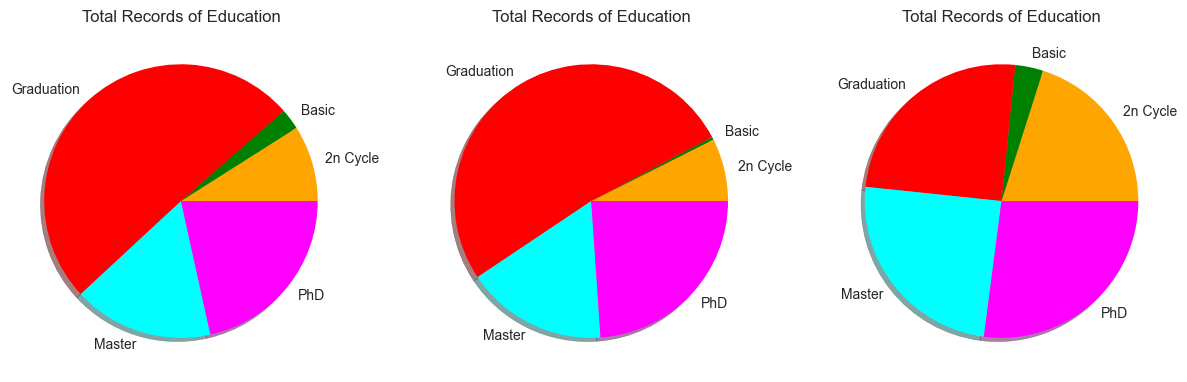

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.pie(x=education_group.TotalRecords,labels=education_group.index,colors=['orange','green','red','cyan','magenta'],shadow=True)
plt.title(f"Total Records of {education_group.index.name}")

plt.subplot(1,3,2)
plt.pie(x=education_group.TotalAmount,labels=education_group.index,colors=['orange','green','red','cyan','magenta'],shadow=True)
plt.title(f"Total Records of {education_group.index.name}")

plt.subplot(1,3,3)
plt.pie(x=education_group.AvgAmount,labels=education_group.index,colors=['orange','green','red','cyan','magenta'],shadow=True)
plt.title(f"Total Records of {education_group.index.name}")



In [36]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'AgeGroup', 'TotalSpendings', 'Children', 'MonthEnorllement'],
      dtype='object')

In [37]:
finaldf=df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AgeGroup'], axis=1)

In [38]:
finaldf.head()

,Income,Recency,Age,TotalSpendings,Children,MonthEnorllement
0,58138.0,58,58,1617,0,28
1,46344.0,38,61,27,2,10
2,71613.0,26,50,776,0,17
3,26646.0,26,31,53,1,11
4,58293.0,94,34,422,1,12


In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [177]:
relevant_cols = ["Income","Recency","Age","TotalSpendings","Children","MonthEnorllement"]

customer_df = finaldf[relevant_cols]

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)


In [43]:
#s=finaldf.to_numpy()
s=finaldf[["Income","Recency","Age","TotalSpendings","Children","MonthEnorllement"]].to_numpy()
s

array([[5.8138e+04, 5.8000e+01, 5.8000e+01, 1.6170e+03, 0.0000e+00,
        2.8000e+01],
       [4.6344e+04, 3.8000e+01, 6.1000e+01, 2.7000e+01, 2.0000e+00,
        1.0000e+01],
       [7.1613e+04, 2.6000e+01, 5.0000e+01, 7.7600e+02, 0.0000e+00,
        1.7000e+01],
       ...,
       [5.6981e+04, 9.1000e+01, 3.4000e+01, 1.2410e+03, 0.0000e+00,
        1.2000e+01],
       [6.9245e+04, 8.0000e+00, 5.9000e+01, 8.4300e+02, 1.0000e+00,
        1.2000e+01],
       [5.2869e+04, 4.0000e+01, 6.1000e+01, 1.7200e+02, 2.0000e+00,
        2.7000e+01]])

In [176]:
X[:, 0]

array([-6.92324165e+00, -8.63062033e+00, -9.63048069e+00, -2.30647659e+00,
       -7.57005366e+00, -1.00051011e+00, -4.81826839e+00, -5.33964799e+00,
       -7.94308840e+00, -5.54924525e+00, -5.14508990e+00, -7.09669936e+00,
       -5.82641512e+00, -1.83198811e+00, -7.34267235e+00, -7.34072825e+00,
       -7.94653906e+00, -8.24598536e+00, -1.98197711e+00, -4.35098035e+00,
       -1.04768696e+01, -1.10195984e+01, -5.17255904e+00, -2.40671820e+00,
       -6.72149498e+00, -6.58935963e+00, -1.46126019e+00, -9.19003455e-01,
       -1.04093517e+01, -6.36722809e+00, -6.72766125e+00, -2.27956075e+00,
       -5.84887560e+00, -6.07993051e+00, -5.26682929e+00, -6.05367512e+00,
       -1.00822205e+01, -1.18708735e+01, -5.37107307e+00, -9.37590900e+00,
       -6.63401987e+00, -9.54609655e+00, -1.69825542e+00, -5.60217602e+00,
       -6.03429022e+00, -6.37230784e+00, -1.02264783e+01, -5.95678148e+00,
       -1.42706535e+00, -6.20735304e-01, -3.28102793e-01, -1.06230545e+01,
       -9.12674270e+00, -

For n_clusters = 2 The average silhouette_score is : 0.612027206420498
For n_clusters = 3 The average silhouette_score is : 0.5505530152954402
For n_clusters = 4 The average silhouette_score is : 0.5384730487659972
For n_clusters = 5 The average silhouette_score is : 0.5395323879425267
For n_clusters = 6 The average silhouette_score is : 0.5232620843741208


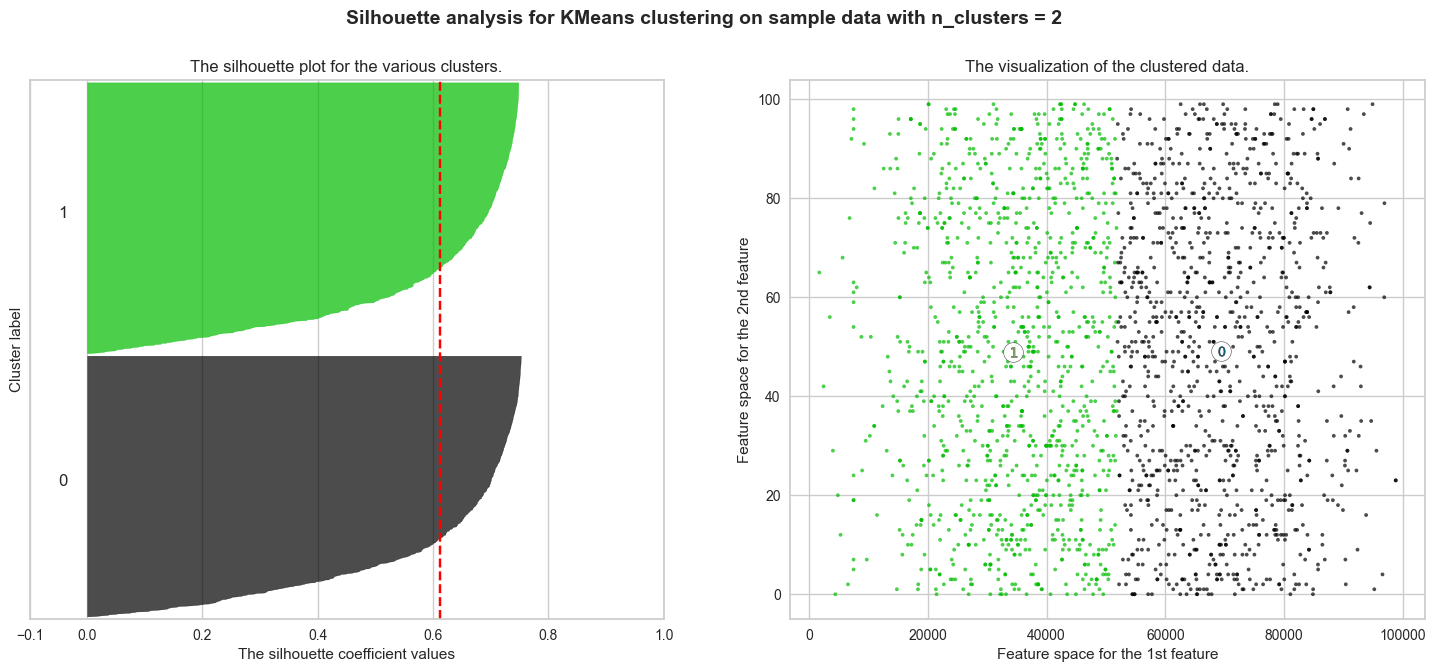

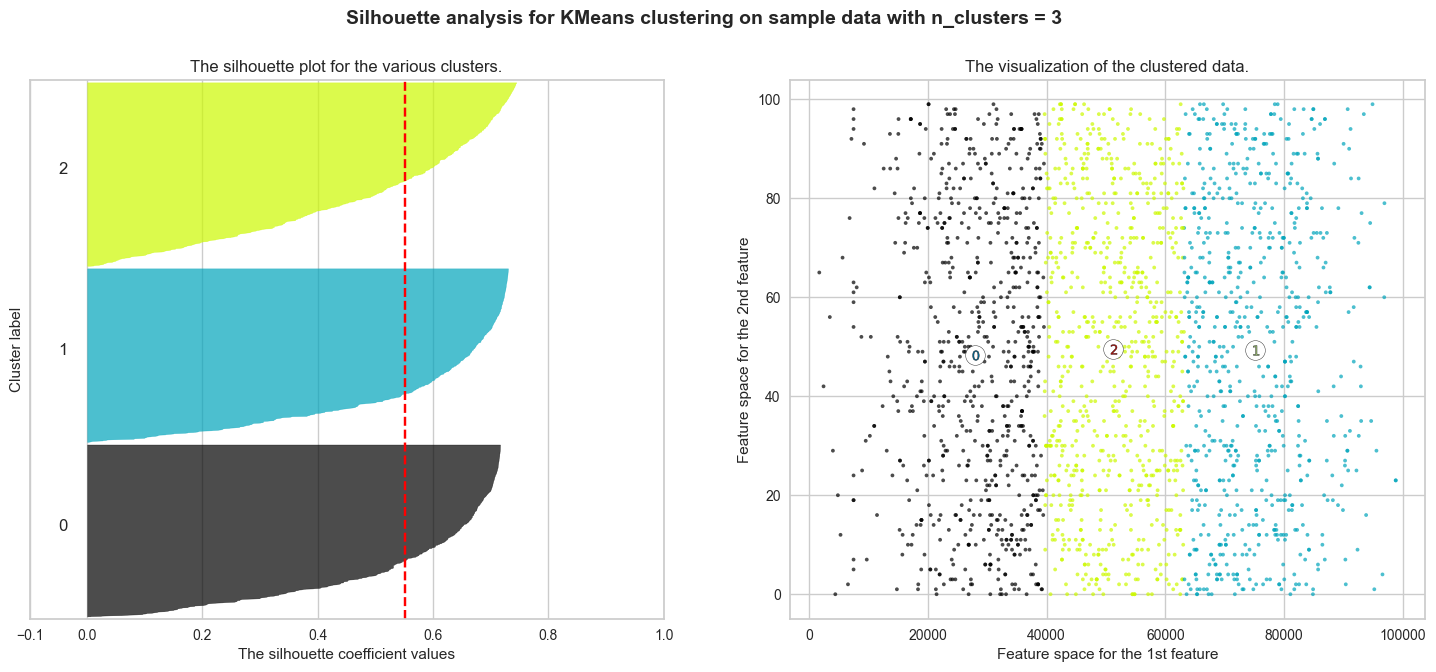

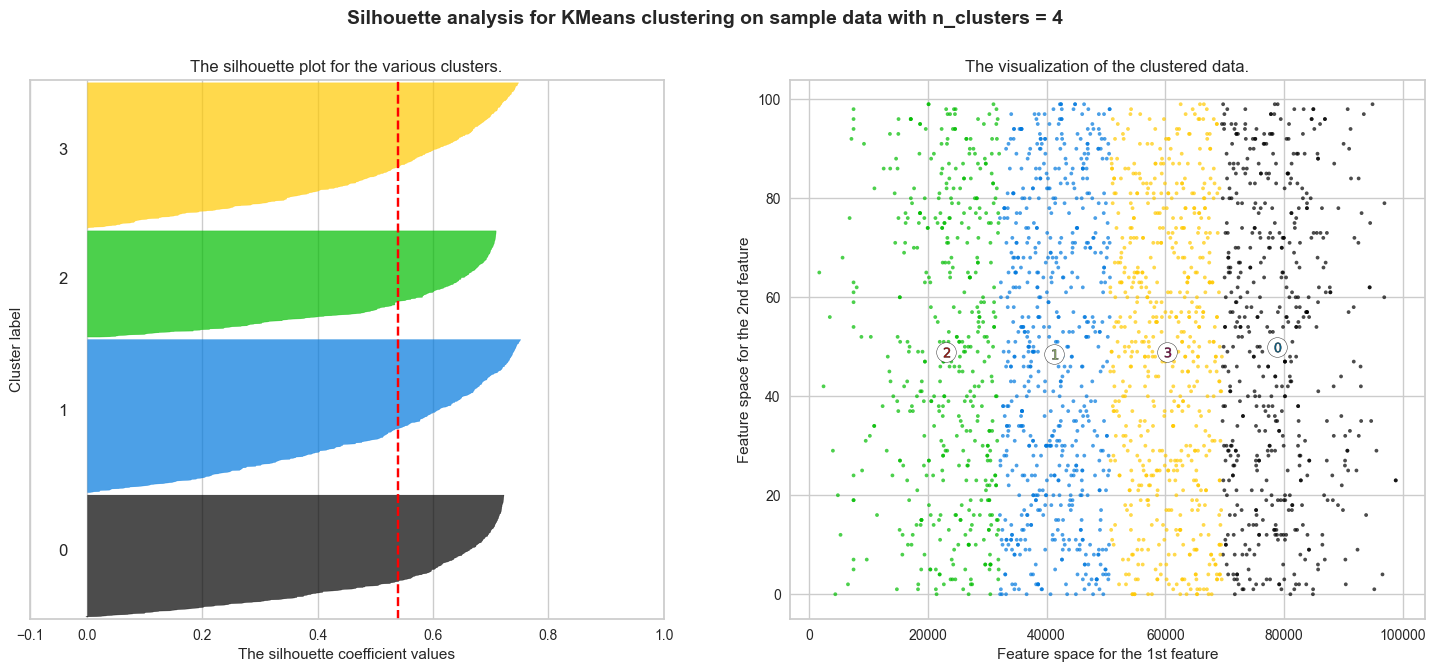

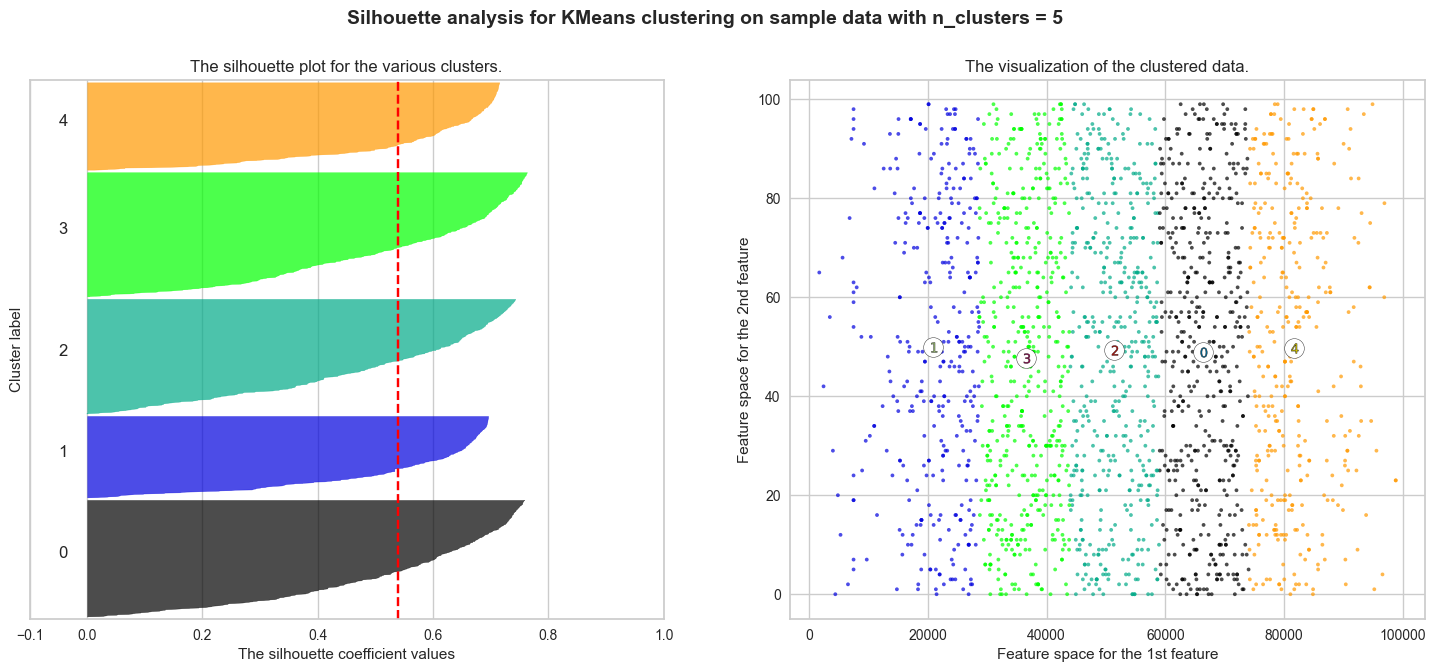

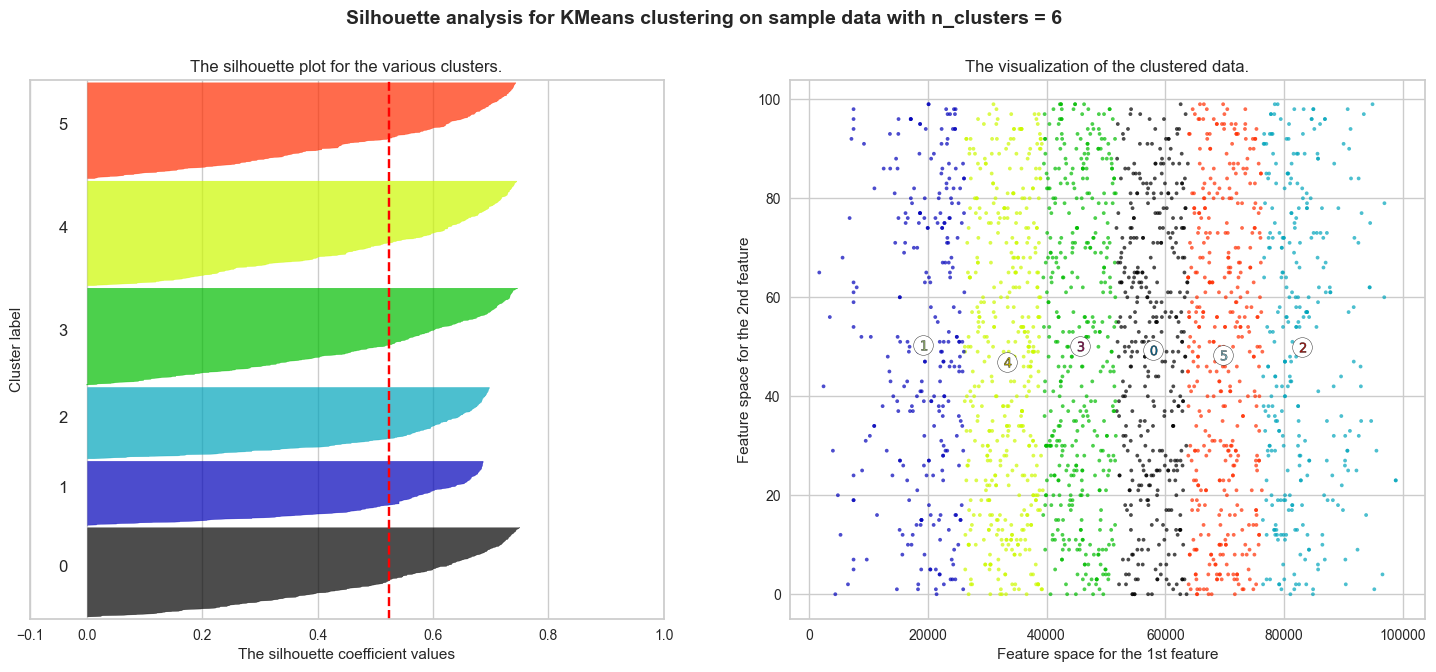

In [41]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(s) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(s)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(s, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(s, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(s[:, 0], s[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [52]:
kmeans=KMeans(n_clusters=3)

In [53]:
kmeans.fit(finaldf)

KMeans(n_clusters=3)

In [57]:
clusters=kmeans.cluster_centers_
clusters

array([[7.51906806e+04, 4.92761506e+01, 4.77126918e+01, 1.27568898e+03,
        4.79776848e-01, 1.79163180e+01],
       [2.79311259e+04, 4.83006993e+01, 4.17916084e+01, 9.23006993e+01,
        1.12307692e+00, 1.81608392e+01],
       [5.13258060e+04, 4.95130208e+01, 4.85989583e+01, 4.58190104e+02,
        1.23046875e+00, 1.84895833e+01]])

In [58]:
y=kmeans.fit_predict(finaldf)

In [62]:
x=finaldf.values

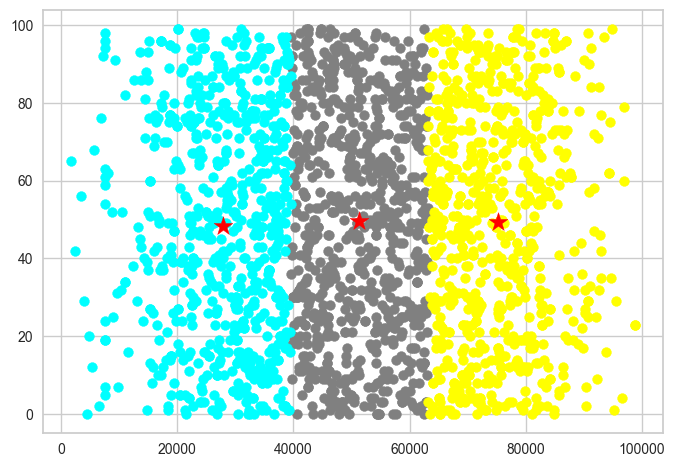

In [74]:
plt.scatter(x[y==0,0],x[y==0,1],s=50,color='grey')
plt.scatter(x[y==1,0],x[y==1,1],s=50,color='yellow')
plt.scatter(x[y==2,0],x[y==2,1],s=50,color='cyan')
plt.scatter(clusters[0][0],clusters[0][1],marker="*",s=200,color='red')
plt.scatter(clusters[1][0],clusters[1][1],marker="*",s=200,color='red')
plt.scatter(clusters[2][0],clusters[2][1],marker="*",s=200,color='red')



In [75]:
finaldf["Cluster"]=y

In [76]:
finaldf

,Income,Recency,Age,TotalSpendings,Children,MonthEnorllement,Cluster
0,58138.0,58,58,1617,0,28,0
1,46344.0,38,61,27,2,10,0
2,71613.0,26,50,776,0,17,1
3,26646.0,26,31,53,1,11,2
4,58293.0,94,34,422,1,12,0
...,...,...,...,...,...,...,...
2235,61223.0,46,48,1341,1,19,0
2236,64014.0,56,69,444,3,7,1
2237,56981.0,91,34,1241,0,12,0
2238,69245.0,8,59,843,1,12,1


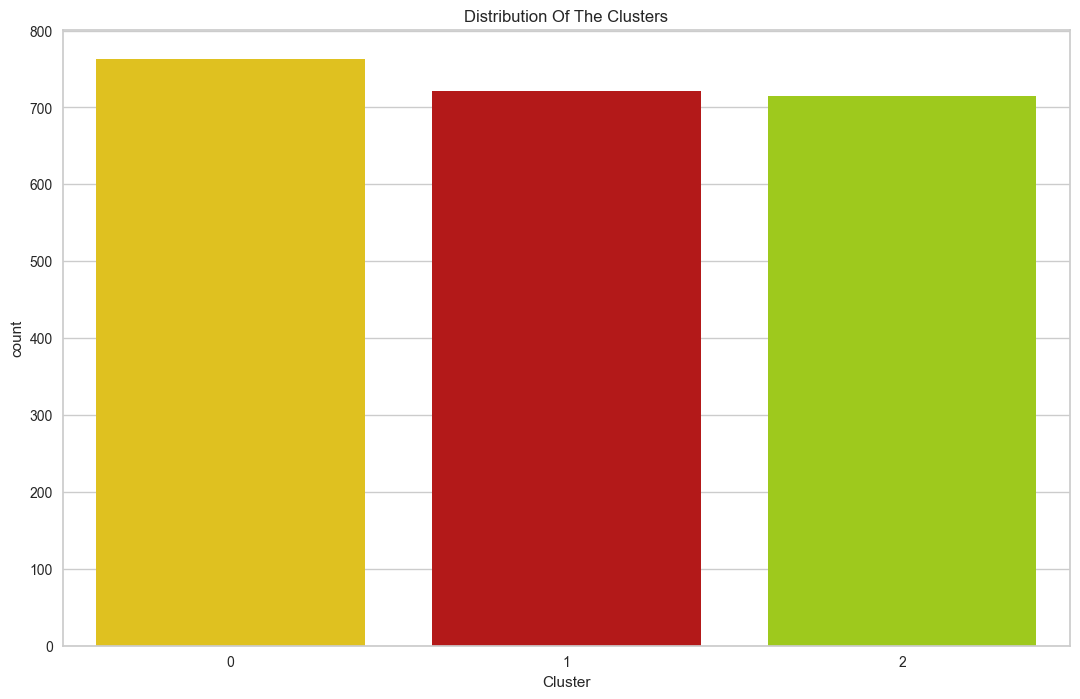

In [77]:
pal = ['gold','#cc0000', '#ace600','#33cccc']
plt.figure(figsize=(13,8))
pl = sns.countplot(x=finaldf['Cluster'], palette= pal)
pl.set_title('Distribution Of The Clusters')
plt.show()
     


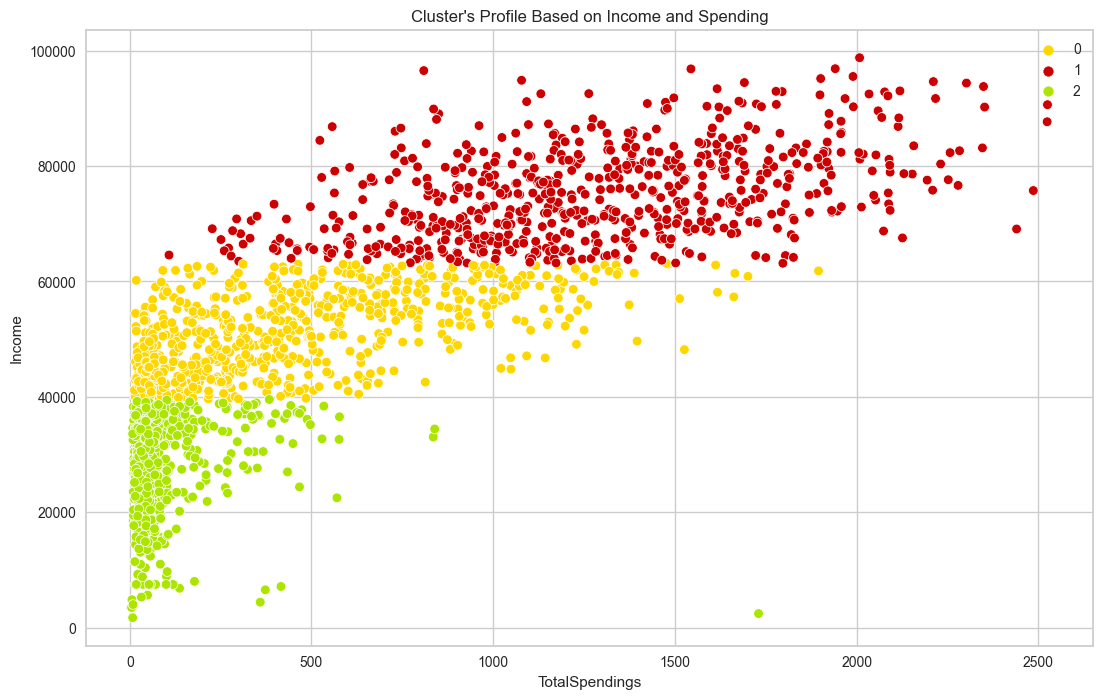

In [80]:
plt.figure(figsize=(13,8))
pl = sns.scatterplot(data=finaldf, x=finaldf['TotalSpendings'], y=finaldf['Income'], hue=finaldf['Cluster'], palette= pal)
pl.set_title("Cluster's Profile Based on Income and Spending")
plt.legend();
     


In [ ]:
#group 0:average income and  average spendings
#group 1:high income and high spendings
#group 2: low income and low spendings

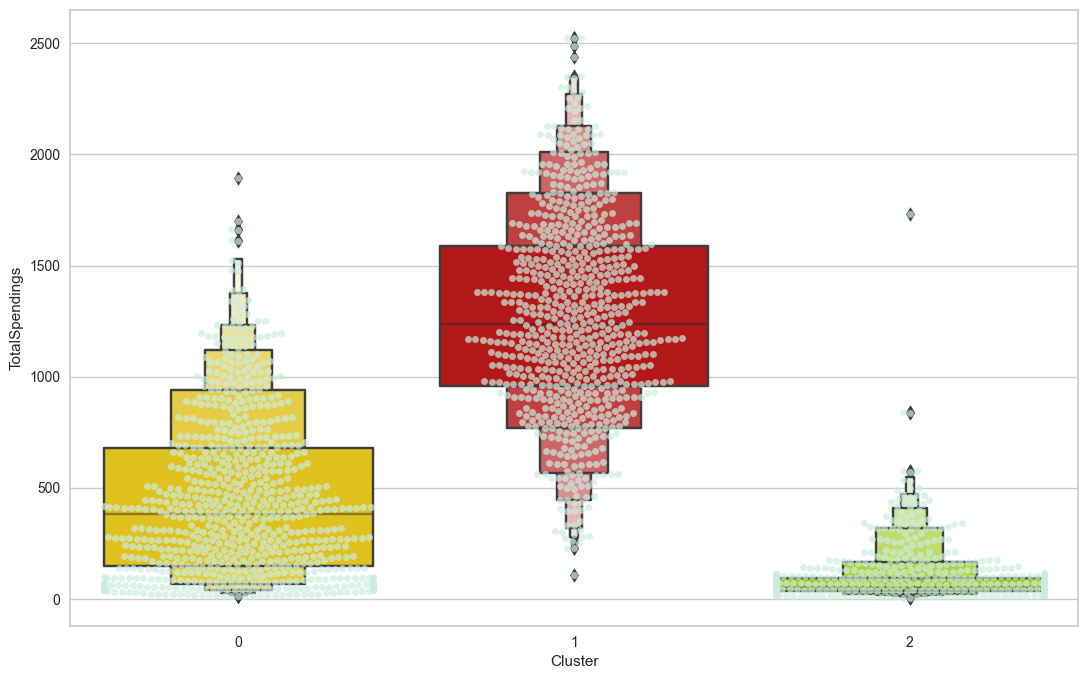

In [82]:
plt.figure(figsize=(13,8))
pl = sns.swarmplot(x=finaldf['Cluster'], y=finaldf['TotalSpendings'], color="#CBEDDD", alpha=0.7)
pl = sns.boxenplot(x=finaldf['Cluster'], y=finaldf['TotalSpendings'], palette=pal)
plt.show();
     

In [ ]:
#cluster 0 : 0 to 1500 spendings
#cluster 1: 0 to 2500 spendings
#cluster 3: 0 to 500 spendings